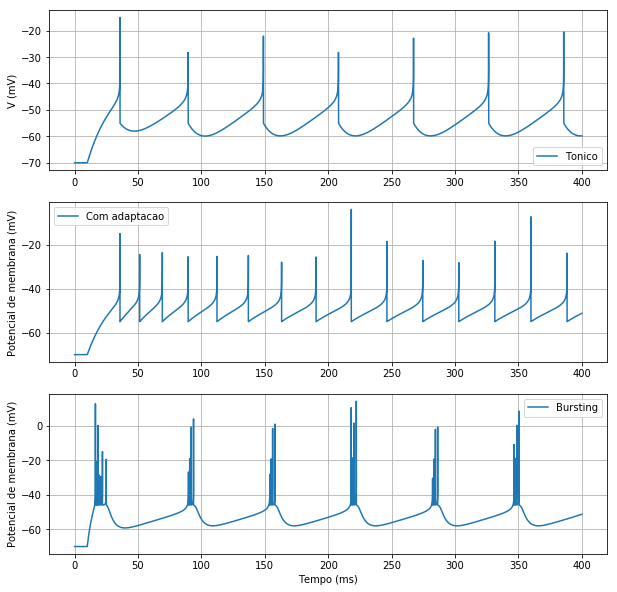

In [14]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex. tools import input_factory

####
v_rest= -70*b2.mV #EL

firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

v_max = 20*b2.mV

membrane_resistence = 500*b2.Mohm
conductance_L = 1/membrane_resistence
###
tau_m = 20*b2.ms
tau_w = 30*b2.ms
v_reset= -55*b2.mV #Vreset
a = 0*b2.nsiemens
b = 60*b2.pA

membrane_capacitance = tau_m/membrane_resistence

current = 65
input_current = input_factory.get_step_current(
t_start=10, t_end=400, unit_time=b2.ms,
amplitude=current*b2.pA) 

simulation_time = 400
dt =  0.01 * b2.ms 
# differential equation of Leaky Integrate-and-Fire model
eqs = """

dv/dt = (conductance_L/membrane_capacitance)*(v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a/tau_w) * (v - v_rest) - (w/tau_w) : ampere
"""
#tonico
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b", threshold="v>v_max", method="euler", dt=dt)
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,1,1)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
plt.ylabel('V (mV)')
plt.legend(['Tonico'])
plt.grid()

#Com adaptacao
tau_m = 20*b2.ms
tau_w = 100*b2.ms
v_reset= -55*b2.mV #Vreset
a = 0*b2.nsiemens
b = 5*b2.pA
membrane_capacitance = tau_m/membrane_resistence

neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b", threshold="v>v_max", method="euler", dt=dt)
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

fig.add_subplot(3,1,2)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
plt.ylabel('Potencial de membrana (mV)')
plt.legend(['Com adaptacao'])
plt.grid()

#Bursting
tau_m = 5*b2.ms
tau_w = 100*b2.ms
v_reset= -46*b2.mV #Vreset
a = -0.5*b2.nsiemens
b = 7*b2.pA
membrane_capacitance = tau_m/membrane_resistence

neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b", threshold="v>v_max", method="euler", dt=dt)
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

fig.add_subplot(3,1,3)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
plt.xlabel('Tempo (ms)')
plt.ylabel('Potencial de membrana (mV)')
plt.legend(['Bursting'])
plt.grid()
plt.show()#%%
